In [8]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import IPython
import torch
import torchaudio

In [28]:
y, sr = librosa.load('/home/yangwenhao/dataset/voxceleb1/voxceleb1_wav/vox1_dev_wav/wav/id10001/1zcIwhmdeo4/00001.wav', sr=16000)

f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'),
                                             sr=sr, frame_length=400, win_length=200, hop_length=512)

times = librosa.times_like(f0)

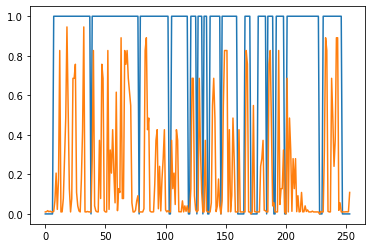

In [29]:
plt.plot(voiced_flag)

plt.plot(voiced_probs)

In [19]:
IPython.display.Audio(y, rate=sr)

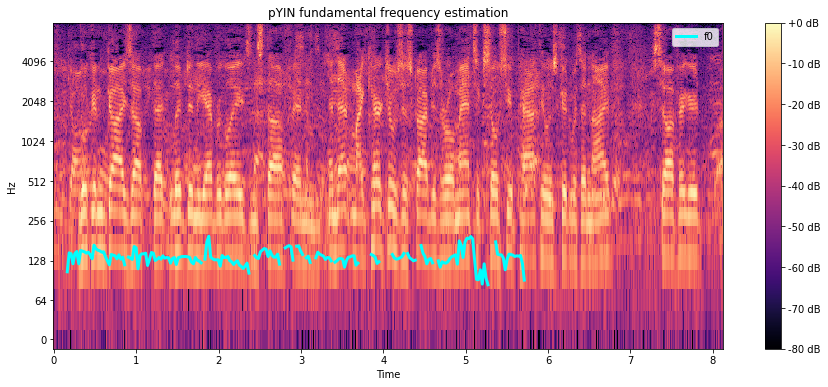

In [20]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, n_fft=512, win_length=400, hop_length=160)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 6))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax, sr=sr, hop_length=160)

ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [30]:
transform = torchaudio.transforms.PitchShift(sr, 1)
y_t = torch.tensor(y)

pitch_yt = transform(y_t)

In [31]:
print(pitch_yt.shape)

torch.Size([129921])


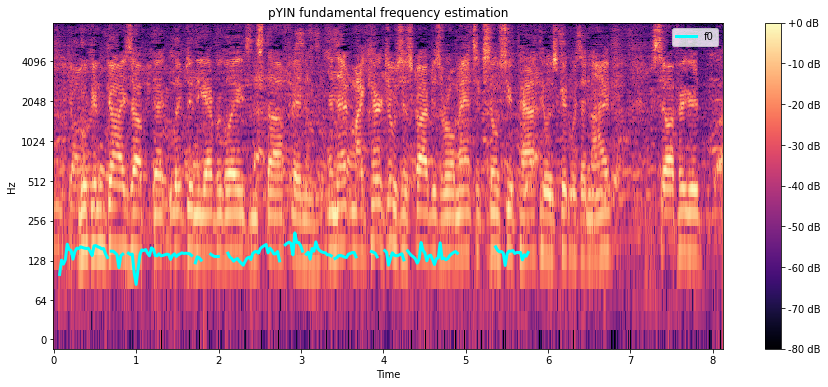

In [34]:
py = pitch_yt.detach().numpy()
D = librosa.amplitude_to_db(np.abs(librosa.stft(py, n_fft=512, win_length=400, hop_length=160)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 6))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax, sr=sr, hop_length=160)

f0_py, voiced_flag, voiced_probs = librosa.pyin(py, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'),
                                             sr=sr, frame_length=400, win_length=200, hop_length=512)

times = librosa.times_like(f0_py)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0_py, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

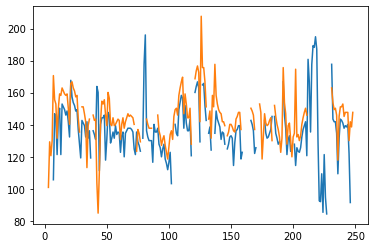

In [33]:
plt.plot(f0)
plt.plot(f0_py)

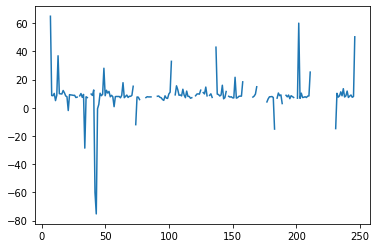

In [35]:
plt.plot(f0_py-f0)


In [36]:
IPython.display.Audio(py, rate=sr)

In [25]:
print(sr)

16000


In [16]:
y, sr = librosa.load(librosa.ex('trumpet'))
IPython.display.Audio(y, rate=sr)

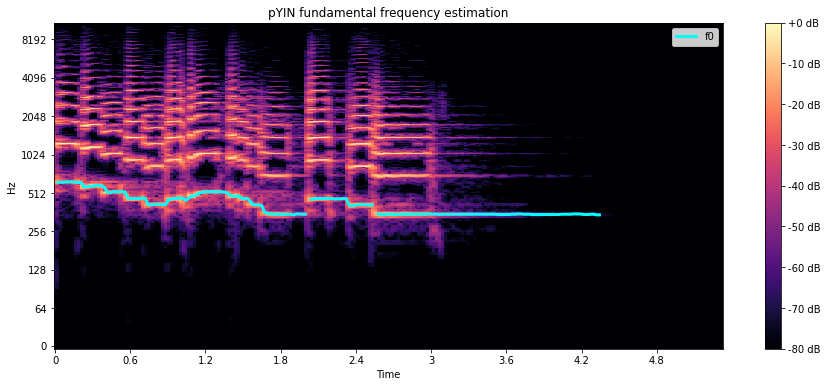

In [54]:
y, sr = librosa.load(librosa.ex('trumpet'))
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'),
                                             sr=sr)
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 6))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')